In [1]:
import os
import data_helpers
import networkx
import pandas as ps
from data_generator import *
import matplotlib.pyplot as plt

config types: <class 'numpy.int32'> <class 'numpy.float32'> <dtype: 'int32'> <dtype: 'float32'>


In [2]:
countryDirPath = "./data/football-data-co-uk/England"
df = data_helpers.get_master_df_from_football_data_co_uk(countryDirPath)
print(len(df.columns), df.columns)

35 Index(['id', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA'],
      dtype='object')


In [3]:
QUALITY = 75

In [4]:
targetLength = 50
minCurrent = 1e-7
sinceDaysAgo = 365 * 20
qualityPct = QUALITY
conductance365 = 0.9
chooseDivs=False

country = countryDirPath.split('/')[-1]
filename = country + '-' + str(targetLength) + '-' + str(minCurrent) + '-' + str(sinceDaysAgo) + '-' + str(qualityPct) + '-' + str(conductance365) + '-' + str(chooseDivs) + '.json'
filepath = os.path.join(os.getcwd(), 'data', 'id_to_ids', filename)

id_to_ids = data_helpers.fixture_id_to_ids_uk_maxflow(targetLength, minCurrent, sinceDaysAgo, qualityPct, conductance365, df, chooseDivs=chooseDivs)
data_helpers.SaveJsonData(id_to_ids, filepath)

id_to_ids = data_helpers.LoadJsonData(filepath)

Text(0.5, 1.0, 'Max length of ids: 100')

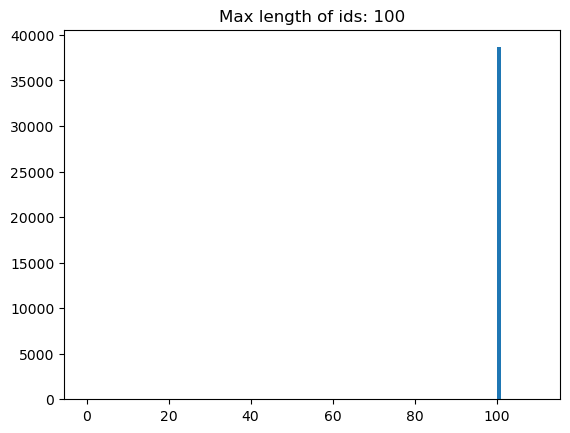

In [5]:
lengths = [len(ids) for (tag, label, ids) in id_to_ids.values()]
maxLen = max(lengths)
plt.hist(lengths, np.linspace(0, int(maxLen*1.1), int(maxLen*1.1) + 1))
plt.ylim(plt.ylim())
maxLen = max(lengths)
# plt.plot([maxLen, maxLen], plt.ylim())
plt.title(f'Max length of ids: {maxLen}')

Text(0.5, 1.0, 'Max length of ids: 100')

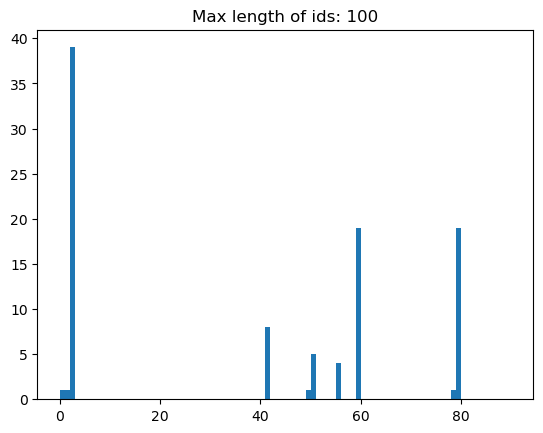

In [6]:
lengths = [len(ids) for (tag, label, ids) in id_to_ids.values()]
maxLen = max(lengths)
plt.hist(lengths, np.linspace(0, int(maxLen*0.9), int(maxLen*0.9) + 1))
plt.ylim(plt.ylim())
maxLen = max(lengths)
# plt.plot([maxLen, maxLen], plt.ylim())
plt.title(f'Max length of ids: {maxLen}')